In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import math

In [4]:
tickers = ["SPY"]

start = "2020-01-01"
end = "2025-04-05"

data = yf.download(tickers, start, end)
data.to_csv('./SPY.csv', index=False)

data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2025-03-31,559.390015,560.710022,546.869995,549.830017,95328200
2025-04-01,560.969971,562.940002,553.679993,557.450012,54609600
2025-04-02,564.520020,567.419983,554.809998,555.049988,76014500
2025-04-03,536.700012,547.969971,536.700012,545.109985,125986000
2025-04-04,505.279999,525.869995,505.059998,523.669983,216189500


In [5]:
x = data[['High', 'Low', 'Open', 'Volume']].values #input
y = data[['Close']].values #goal to predict

#x_train 80%
#x_test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # state 0 ensures split can be reproduced

regModel = LinearRegression()
regModel.fit(x_train, y_train)

regModel.coef_

array([[ 8.44540875e-01,  8.08024741e-01, -6.52820179e-01,
        -5.48127521e-09]])

In [ ]:
regModel.score(x_train, y_train)

# if train score high and test score low then probs overfit

0.9995975572216633

In [8]:
pred = regModel.predict(x_test)

In [13]:
# check 2nd score for test variability
r2_score(y_test, pred)

0.9997252841394694

In [15]:
actualvPred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
actualvPred.head()

,Actual,Predicted
0,595.418884,596.866587
1,421.866516,421.399160
2,515.637268,516.457587
3,321.956299,324.394659
4,566.423950,566.688382


Text(0, 0.5, 'Closing Price')

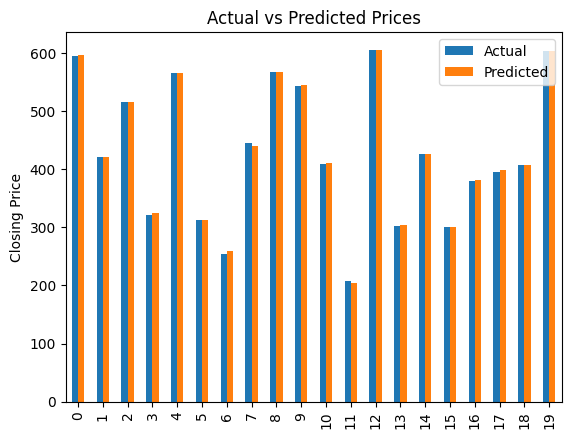

In [21]:
graph = actualvPred.head(20)
graph.plot(kind="bar")
plt.title('Actual vs Predicted Prices')
plt.ylabel('Closing Price')

Text(0, 0.5, 'predicted')

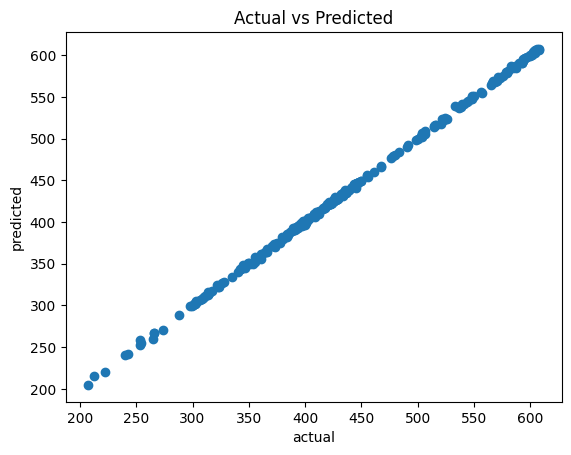

In [22]:
fig = plt.figure()
plt.scatter(y_test, pred)
plt.title('Actual vs Predicted')
plt.xlabel('actual')
plt.ylabel('predicted')

In [26]:
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, pred))
print("MSE", metrics.mean_squared_error(y_test, pred))
print("RMSE", math.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error 1.128676807603341
MSE 2.3139184998085374
RMSE 1.5211569609374758


In [31]:
# Backtest for better MSE etc.
mae_list, mse_list, rmse_list = [], [], []

window = 100 # past obs
test_size = 10 # observations to predict

for i in range(0, len(data) - window - test_size, test_size):
    train_data = data.iloc[i:i + window]
    test_data = data.iloc[i:i + window:i +window +test_size]

    x_train, y_train = train_data[['High', 'Low', 'Open', 'Volume']], train_data['Close']
    x_test, y_test = test_data[['High', 'Low', 'Open', 'Volume']], test_data['Close']

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print("Average MAE:", np.mean(mae_list))
    print("Average MSE:", np.mean(mse_list))
    print("Average RMSE:", np.mean(rmse_list))


Average MAE: 0.9861174827976242
Average MSE: 0.9724276898791228
Average RMSE: 0.9861174827976242
Average MAE: 0.8084263477364289
Average MSE: 0.6851272991937973
Average RMSE: 0.8084263477364289
Average MAE: 0.9420822942731206
Average MSE: 0.944296299591702
Average RMSE: 0.9420822942731206
Average MAE: 1.000595623074176
Average MSE: 1.054045967663936
Average RMSE: 1.000595623074176
Average MAE: 1.785202527315107
Average MSE: 5.691663533661386
Average RMSE: 1.785202527315107
Average MAE: 2.9803442558960804
Average MSE: 18.111533532404632
Average RMSE: 2.9803442558960804
Average MAE: 2.8840177335424153
Average MSE: 16.283872494055526
Average RMSE: 2.8840177335424153
Average MAE: 2.9088091212203224
Average MSE: 15.435997724850365
Average RMSE: 2.9088091212203224
Average MAE: 2.7660796445205733
Average MSE: 14.014016646788109
Average RMSE: 2.7660796445205733
Average MAE: 2.805566398953272
Average MSE: 13.611773695177627
Average RMSE: 2.805566398953272
Average MAE: 2.8331576015395865
Average